In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
pi = np.pi

In [4]:
%matplotlib notebook

In [5]:
def rayleigh_range(w0, lam):
    return np.pi * w0**2 / lam

def gaussian_beam_e_field(x, y, z, w0, lam, E0=1, theta=0, ek=1, phi=0):
    # rotate coordinates in the x-z-plane
    x_rot = np.cos(theta)*x - np.sin(theta)*z
    z_rot = np.sin(theta)*x + np.cos(theta)*z
    
    x = x_rot
    z = z_rot
    
    # calculate parameters of gaussian beam
    zR = rayleigh_range(w0, lam)
    wz = w0*np.sqrt(1+ (z/zR)**2)
    Rcurv = z * (1 + (zR/z)**2)
    guoy = np.arctan(z/zR)
    rsquare = x**2 + y**2
    k = ek*2*np.pi / lam
    
    prefactor = E0 * w0/wz
    radial = np.exp(-rsquare/wz**2)
    phase = np.exp(-1j*(k*z + k*rsquare/2/Rcurv - guoy + phi))
    
    return prefactor * radial * phase

def plot_intensity(I, xx, zz):
    fig, axe = plt.subplots(figsize=(6,6))

    axe.imshow(I)
    axe.axis('off')

    # show the axial profile
    divider = make_axes_locatable(axe)
    axebottom = divider.append_axes("bottom", size=1, sharex=axe, pad=0.3)
    I_ax = I[zz == np.min(np.abs(zz))]
    axebottom.plot(I_ax)
    
    # show the radial profile
    axeright = divider.append_axes("right", size=1, sharey=axe, pad=0.3)
    I_rad = I[xx == np.min(np.abs(xx))]
    axeright.plot(I_rad, np.arange(len(I_rad)))
    fig.tight_layout()

# Single Beam ODT

In [6]:
x = np.linspace(-10, 10, 1000)

xx, zz = np.meshgrid(x,x)

E0 = gaussian_beam_e_field(zz, 0, xx, 1, 1)

I0 = (E0* E0.conj()).real

<IPython.core.display.Javascript object>


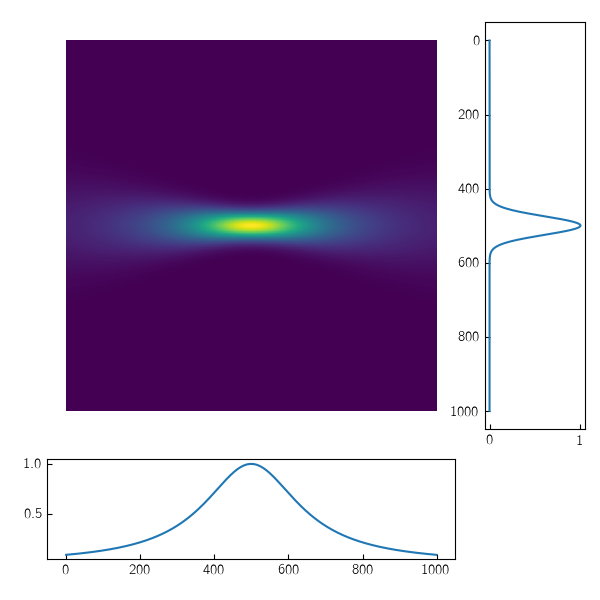

In [7]:
plot_intensity(I0, xx, zz)

# Optical Lattice
To create an optical lattice, we just add a second counter-propagating beam.

<IPython.core.display.Javascript object>


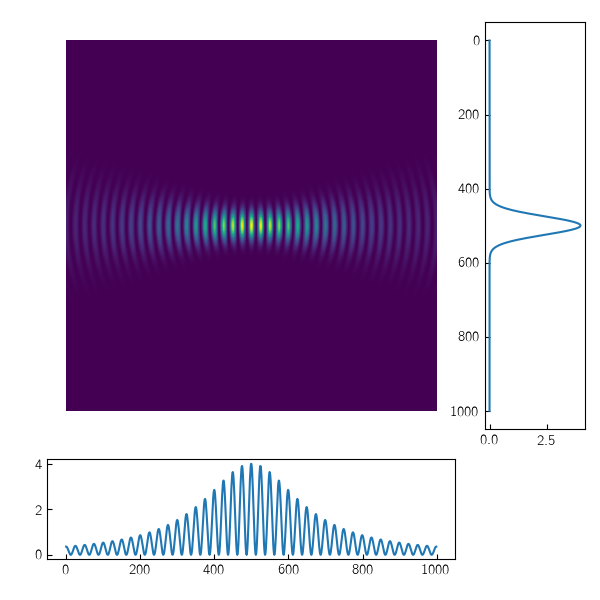

In [8]:
E1 = gaussian_beam_e_field(zz, 0, xx, w0=1, lam=1, ek=-1)

E = E0 + E1
I = (E * E.conj()).real

plot_intensity(I, xx, zz)

# General Polarization

<IPython.core.display.Javascript object>


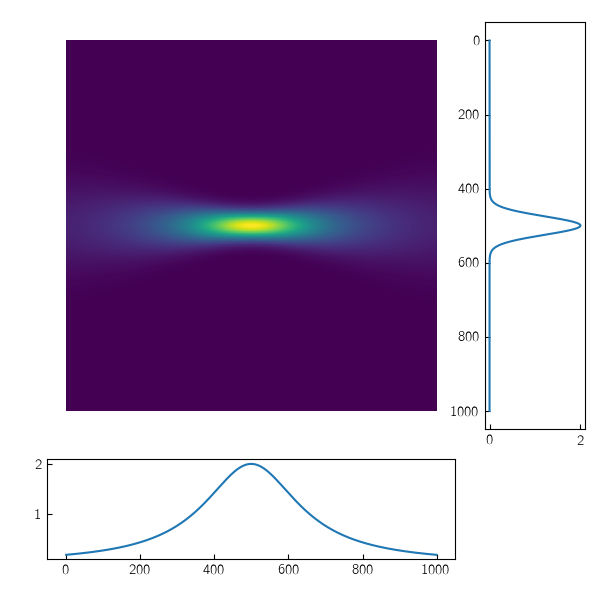

In [9]:
ex = np.array([1,0])
ey = np.array([0,1])

oos2 = 1/np.sqrt(2)
e45 = oos2 * (ex + ey)
elh = oos2 * (ex - 1j*ey)
erh = oos2 * (ex + 1j*ey)

E0_vec = np.einsum('ij, k', E0, ex)
E1_vec = np.einsum('ij, k', E1, ey)

Etot_vec = E0_vec + E1_vec

Itot = np.einsum('ijk, ijk -> ij', Etot_vec, Etot_vec.conj())

plot_intensity(Itot.real, xx, zz)

# xODT
A crossed optical dipole trap with orthogonaly polarized beams.

In [10]:
def xODT_orth_plot(theta):
    theta = np.deg2rad(theta)
    E0 = gaussian_beam_e_field(zz, 0, xx, 1, 1/30, theta=theta/2)
    E1 = gaussian_beam_e_field(zz, 0, xx,1, 1/30, ek=-1, theta=-theta/2)

    I0 = (E0 * E0.conj()).real
    I1 = (E1 * E1.conj()).real
    Itot = I0 + I1

    plot_intensity(Itot, xx, zz)
    
output = interact_manual(xODT_orth_plot, theta=(0,90))
#output.layout.height= '500px'
output

interactive(children=(IntSlider(value=45, description='theta', max=90), Button(description='Run Interact', sty…

<function __main__.xODT_orth_plot(theta)>

# xODT Lattice

In [11]:
def xODTplot(theta_deg):
    theta = np.deg2rad(theta_deg)
    E0 = gaussian_beam_e_field(zz, 0, xx, 1, 1, theta=theta/2)
    E1 = gaussian_beam_e_field(zz, 0, xx, 1, 1, ek=-1, theta=-theta/2)

    Etot = E0 + E1
    Itot = (Etot * Etot.conj()).real

    plot_intensity(Itot, xx, zz)
    
output = interact_manual(xODTplot, theta_deg=(0,90))
#output.layout.height= '500px'
output

interactive(children=(IntSlider(value=45, description='theta_deg', max=90), Button(description='Run Interact',…

<function __main__.xODTplot(theta_deg)>

# Superlattice
Two colinear standing waves with orthogonal polarizations and optical frequencies of $\omega_0$ and $2 \omega_0$. For 0 phaseshift a double well potential shows.

In [12]:
def plot_superlattice(phi, theta):
    phi = np.deg2rad(phi)
    theta = np.deg2rad(theta)
    E0_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, theta=theta, phi=0)
    E0_back = gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=-1, theta=theta, phi=0)

    E1_forth = gaussian_beam_e_field(zz, 0, xx, 5, 4, ek=1, phi=0)
    E1_back = gaussian_beam_e_field(zz, 0, xx, 5, 4, ek=-1, phi=phi)

    E0 = (E0_forth + E0_back)
    I0 = (E0 * E0.conj()).real

    E1 = (E1_forth + E1_back)
    I1 = (E1 * E1.conj()).real

    #Etot = E0 + E1
    #Itot = (Etot*Etot.conj()).real
    Itot = I0 + I1

    plot_intensity(Itot, xx, zz)
    
output = interact(plot_superlattice, phi=(0,180), theta=(0,90))
#output.layout.height= '500px'
output

interactive(children=(IntSlider(value=90, description='phi', max=180), IntSlider(value=45, description='theta'…

<function __main__.plot_superlattice(phi, theta)>

# Optical Checkerboard
Two orthogonal standing waves at 90°.

In [15]:
def plot_checkerboard(phi):
    phi = np.deg2rad(phi)
    theta = np.deg2rad(90)
    E0_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, theta=theta, phi=0)
    E0_back = gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=-1, theta=theta, phi=0)

    E1_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=1, phi=0)
    E1_back = gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=-1, phi=phi)

    E0 = (E0_forth + E0_back)
    I0 = (E0 * E0.conj()).real

    E1 = (E1_forth + E1_back)
    I1 = (E1 * E1.conj()).real

    Etot = E0 + E1
    #Itot = (Etot*Etot.conj()).real
    Itot = I0 + I1

    plot_intensity(Itot, xx, zz)
    
output = interact(plot_checkerboard, phi=(0,180))
#output.layout.height= '500px'
output

interactive(children=(IntSlider(value=90, description='phi', max=180), Output()), _dom_classes=('widget-intera…

<function __main__.plot_checkerboard(phi)>

# Optical Honeycomb
Three interfering beams at 120°.

In [14]:
def plot_honeycomb(delta, theta2):
    phi = np.deg2rad(180)
    theta2 = np.deg2rad(240)
    theta = np.deg2rad(120)
    E0_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, theta=theta, phi=0)
    E0_back = 0#gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=-1, theta=theta, phi=0)

    E1_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=1, phi=0)
    E1_back = 0#gaussian_beam_e_field(zz, 0, xx, 5, 2, ek=-1, phi=phi)
    
    E2_forth = gaussian_beam_e_field(zz, 0, xx, 5, 2, theta=theta2, phi=0)
    E2_back = 0#gaussian_beam_e_field(zz, 0, xx, 5, 2-delta, ek=-1, theta=theta2, phi=pi)

    E0 = (E0_forth + E0_back)
    I0 = (E0 * E0.conj()).real

    E1 = (E1_forth + E1_back)
    I1 = (E1 * E1.conj()).real
    
    E2 = (E2_forth + E2_back)
    I2 = (E2 * E2.conj()).real    

    Etot = E0 + E1 + E2
    Itot = (Etot*Etot.conj()).real
    #Itot = I0 + I1
    #Itot += I2
    plot_intensity(Itot, xx, zz)
    
output = interact(plot_honeycomb, delta=(0,1.9), theta2=(0,180))
#output.layout.height= '500px'
output

interactive(children=(FloatSlider(value=0.95, description='delta', max=1.9), IntSlider(value=90, description='…

<function __main__.plot_honeycomb(delta, theta2)>